## Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных**

* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В данных присутствуют пропуски, есть несоответствие типа данных.

### Предобработка данных

 В двух столбцах есть пропущенные значения. Один из них — days_employed. Пропуски в этом столбце обработаем чуть позже. Другой столбец с пропущенными значениями — total_income — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type. Например, у человека с типом занятости сотрудник пропуск в столбце total_income должен быть заполнен медианным доходом среди всех записей с тем же типом.

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

Обработка аномальных значений

In [6]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведите медианное значение трудового стажа days_employed в днях.

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

**Удаление пропусков**

Заполним пропуски в столбце days_employed медианными значениями по каждого типа занятости income_type.

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Изменение типов данных**

In [13]:
data['total_income'] = data['total_income'].astype(int)

**Обработка дубликатов**

Обработаем неявные дубликаты в столбце education. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. 

In [14]:
data['education'] = data['education'].str.lower()

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

**Категоризация данных**

создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Посмотрим на перечень уникальных целей взятия кредита из столбца `purpose`.

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [22]:
data.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


Была проведена предобработка данных, добавили дополнительные признаки.

### Исследуем данные и ответим на поставленные вопросы

 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
debt_from_children = pd.DataFrame()
debt_from_children['count_children'] = data.groupby('children')['debt'].count()
debt_from_children['sum_children'] = data.groupby('children')['debt'].sum()
debt_from_children['result_children'] = debt_from_children['sum_children'] / debt_from_children['count_children'] 
debt_from_children.sort_values('result_children', ascending = False)

,count_children,sum_children,result_children
children,,,
4,41,4,0.097561
2,2052,194,0.094542
1,4808,444,0.092346
3,330,27,0.081818
0,14091,1063,0.075438
5,9,0,0.000000


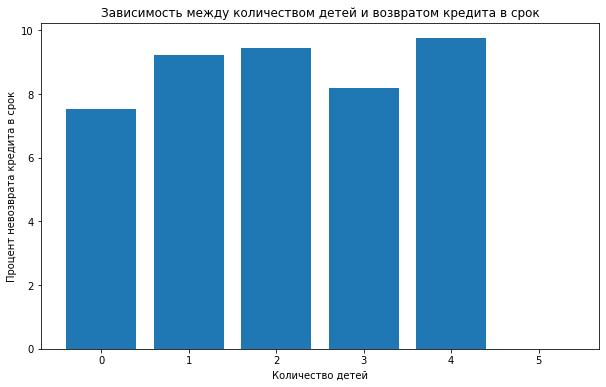

In [24]:
import matplotlib.pyplot as plt

grouped = data.groupby('children')['debt'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(grouped['children'], grouped['debt'] * 100)  # Умножаем на 100, чтобы получить проценты
plt.xlabel('Количество детей')
plt.ylabel('Процент невозврата кредита в срок')
plt.title('Зависимость между количеством детей и возвратом кредита в срок')
plt.show()

**Вывод:** с большим количеством детей заметно увеличение количества просроченных задолжностей, хотя с тремя детьми люди чаще платят в срок, чем с одним ребенком. Данные неоднозначны, возможно, некорректная выборка для этого вопроса. Бездетные реже просрочивают оплату по кредиту, чем люди с детьми.

**Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [25]:
debt_from_family_status = pd.DataFrame()
debt_from_family_status['sum_family_status'] = data.groupby('family_status')['debt'].sum()
debt_from_family_status['count_family_status'] = data.groupby('family_status')['debt'].count()
debt_from_family_status['result_family_status'] = debt_from_family_status['sum_family_status'] / debt_from_family_status['count_family_status'] 
debt_from_family_status.sort_values('result_family_status', ascending=False)

,sum_family_status,count_family_status,result_family_status
family_status,,,
Не женат / не замужем,273,2796,0.097639
гражданский брак,385,4134,0.093130
женат / замужем,927,12261,0.075606
в разводе,84,1189,0.070648
вдовец / вдова,63,951,0.066246


**Вывод:** Да, зависимость присутствует. Люди не замужем/не женатые имеют больший процент невозвратов в кредите. Но также люди, которые развелись или овдовели, чаще платят в срок, чем люди в браке.

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [26]:
debt_from_total_income_category = pd.DataFrame()
debt_from_total_income_category['count'] = data.groupby('total_income_category')['debt'].count()
debt_from_total_income_category['sum'] = data.groupby('total_income_category')['debt'].sum()
debt_from_total_income_category['conversion'] = debt_from_total_income_category['sum'] / debt_from_total_income_category['count']
debt_from_total_income_category.sort_values('conversion', ascending = False)

,count,sum,conversion
total_income_category,,,
E,22,2,0.090909
C,15921,1353,0.084982
A,25,2,0.080000
B,5014,354,0.070602
D,349,21,0.060172


**Вывод:** Для категории "A" и категории "E" слишком маленькая выборка, вследствие этого сложно их рассматривать объективно. Рассмотрим более многочисленные категории. На их основе можно сделать вывод, что люди, имеющие больший доход, чаще являются задолжниками по кредиту. 

**Как разные цели кредита влияют на его возврат в срок?**

In [28]:
category = pd.DataFrame()
category['sum'] = data.groupby('purpose_category')['debt'].sum()
category['count'] = data.groupby('purpose_category')['debt'].count()
category['result'] = category['sum'] / category['count']
category['result']

purpose_category
операции с автомобилем      0.093480
операции с недвижимостью    0.072551
получение образования       0.092528
проведение свадьбы          0.079118
Name: result, dtype: float64

In [29]:
category.sort_values('result', ascending=False)

,sum,count,result
purpose_category,,,
операции с автомобилем,400,4279,0.093480
получение образования,369,3988,0.092528
проведение свадьбы,183,2313,0.079118
операции с недвижимостью,780,10751,0.072551


**Вывод:** Как мы видим, люди, берущие кредит с целью покупки недвижимости, чаще платят в срок. Кредиты на свадьбу просрочивают реже, примерно, как и в случае недвижимости. Кредиты на образование и на автомобили платят хуже.

**Возможные причины появления пропусков в исходных данных**

Появление пропусков в исходных данных в столбцах total_income и days_employed в датасете может быть обусловлено различными причинами. 

1. Ошибка или проблема при сборе данных:
   - В процессе сбора данных могли возникнуть технические проблемы, ошибки или неполадки, которые могли привести к пропускам информации.


2. Отказ заемщиков предоставить информацию:
   - Некоторые заемщики могли отказаться предоставить информацию о своем доходе и трудовом стаже, что привело к возникновению пропусков в данных.


3. Человеческие ошибки при заполнении:
   - Ошибки и пропуски данных могут возникнуть из-за некорректного заполнения анкет заемщиков или ошибок, допущенных на этапе ввода информации в базу данных.
   
   
4. Проблемы с переносом данных:
   - При переносе данных из разных источников или при объединении различных наборов данных могут возникнуть проблемы с сопоставлением информации, что может привести к пропускам в некоторых столбцах.


5. Отсутствие информации у некоторых заемщиков:
   - Некоторые заемщики могут просто не иметь информации о своем доходе или трудовом стаже, что приводит к пропускам в соответствующих столбцах.

**Почему заполнить пропуски медианным значением — лучшее решение для количественных переменных?**

Заполнение пропусков в количественных переменных медианным значением является одним из распространенных методов обработки пропущенных данных по нескольким причинам. Во-первых, сохранение центральной тенденции: использование медианы позволяет сохранить центральное значение (среднее) для переменной, что снижает вероятность искажения статистической информации в случае заполнения пропусков. Во-вторых, устойчивость к выбросам: медиана является более устойчивой к выбросам в данных, чем среднее значение, поэтому заполнение медианным значением может уменьшить влияние выбросов на общую аналитику.

### Общий вывод

В этом проекте нам нужно было разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Для достижения поставленной цели мы выполнили следующее: на этапе предобработки в столбцах days_employed и total_income пропущенные значения заполнили медианными по категориям, устранили артефакты, обработали дубликаты и иследовали разного рода зависимости между долгом по кредиту и другими характеристиками. На основе этого можно сделать следующие выводы:

1. Семейный статус влияет на вероятность платежей по кредиту в срок - люди, бывшие в браке, чаще плятят в срок чем те, кто не бывали в браке, причем разведенные и овдовевшие платят в срок чаще, чем люди в браке. 
2. На основе предоставленной выборки сложно сделать корректный вывод, какое количество детей влияет на срок погашения кредита. Бездетные чаще платят чаще в срок.

Также можно сказать, что цель кредита влияет на его срок погашение и люди, имеющие больший доход, чаще являются задолжниками по кредиту. 

На основе проделанной работы хотелось бы в будущем видеть выборку со сбалансированным количеством детей и доходами, чтобы в будущем дать корректные ответы на поставленные вопросы. 